# Modelo K-Means Mental Health in Tech Survey
## Tercera entrega Proyecto final
### Equipo 2 - Daniela Esparza Espinosa, Cinthya Lorena González García, Jennifer Ariadna Hernández Martínez

In [167]:
#Importar las librerías que usaremos
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

## Lectura dataset limpio

Se leerá el dataset obtenido del csv tras la limpieza


In [168]:

X = pd.read_csv('X_data.csv').to_numpy()
label = pd.read_csv('Y_data.csv')
#n_features son las columnas, puso 2 para poder graficar
#cluster_std es que tan lejos o cerca quiero los puntos
print(X)
print(label)

[[37  1  0 ...  2  1  0]
 [44  0  0 ...  2  2  0]
 [32  0  0 ...  1  2  0]
 ...
 [34  0  0 ...  2  2  0]
 [46  1  0 ...  2  2  0]
 [25  0  0 ...  2  2  0]]
      wellness_program
0                    0
1                    0
2                    0
3                    0
4                    0
...                ...
1247                 0
1248                 0
1249                 0
1250                 0
1251                 0

[1252 rows x 1 columns]


## Declaración de funciones para el cálculo de distancia y centroides correspondientes

### Distancia euclidiana
Para calcular la distancia mínima de cada registro al centroide usamos la distancia euclidiana
$$
d(p, q) = \sqrt{(p_1 - q_1)^2 + (p_2 - q_2)^2 + \cdots + (p_n - q_n)^2} = \sqrt{\sum_{i=1}^{n} (q_i - p_i)^2} = \lVert p - q \rVert
$$

Usar **Distancia euclidiana cuadrática** es más rápido que el clustering con la distancia euclidiana regular.

$$
\lVert p - q \rVert^2
$$

In [169]:
def dist(p, q):
    resta = p - q
    d = np.dot(resta.T, resta)
    return d

### Encontrar la distancia mínima

Para una $x^{(i)}$:

$$
c_i = arg \min_{j} \lVert x^{(i)} - \mu_j \rVert ^2
$$

In [170]:
def min_dist(xi, mu):
    #asigna al centroide que le quede mas cerca, me retorna el indice del cluster (traduce, dist a indx)
    c = []
    k, n = mu.shape
    for i in range(k):
        c.append(dist(xi, mu[i]))
    indx = np.argmin(c)
    
    return indx

In [171]:
def min_dist_all(x, mu):
    #Devuelve el vector de cada xi a que centroide pertenece
    m, n = x.shape
    c = np.zeros(m, dtype = int)
    for i in range(m):
        c[i] = min_dist(x[i], mu)
    return c

## Computar o mover el promedio de centroides

Para cada $k \in  K$:

$$
\mu_k = \frac{\sum_{i=1}^{m} x_i[c_i = k]}{len[c_i = k]}
$$

In [172]:
def move_centroids(x, c, k, mu):
    m, n = x.shape
    new_mu = np.zeros((k,n))
    for i in range(k):
        elements = x[c==i] #Elementos con el mismo centroide
        if (len(elements)==0):
            new_mu[i] = mu[i]
        else:
            new_mu[i] = np.sum(elements, axis = 0) / len(elements)
            
    return new_mu

## Optimización objetivo

$$
J(c_1, \cdots, c_m, \mu_1, \cdots, \mu_k) = \frac{1}{m} \sum_{i=1}^{m} \lVert  x_i - \mu_{c_i} \rVert^2
$$

In [173]:
def cost(x, c, mu):
    m, n = x.shape
    r = []
    for i in range(m):
        idx = c[i]
        r.append(dist(x[i], mu[idx]))
    
    r = np.array(r)
    costo = (1/m) * np.sum(r)
    return costo

# Implementación del algoritmo de K-means

In [174]:
#return mu, c, cluster, J
def kmeans(x, k):
        #Initialize variables
        m, n = x.shape
        idx = np.random.choice(m, k)
        mu = x[idx]
        c = None
        J = []
        cluster = []
        it = 0
        
        while True:
            # Find new assignments
            new_c = min_dist_all(x, mu)
            J.append(cost(x, new_c, mu))
            cluster.append((np.copy(mu), np.copy(new_c)))
            
            it += 1
            # If no assignments have changed, we have finished.
            if np.all(c == new_c):
                break;
            
            # if not, keep the new assignments,
            c = new_c
            
            # Update centroids, compute new means based on c
            mu = move_centroids(x, np.array(c), k, mu)                 
        return mu, c, cluster, J

## Graficar el movimiento de centroides

In [175]:

'''n = len(cluster)
#print(cluster)
cols = 3
rows = int(n / cols)
idx = 0
track = []
print('n', n, 'r,c:', rows, cols)

fig, axs = plt.subplots(rows, cols, figsize=(15, 5*rows))
for i in range(rows):
    img = 0
    for j in range(cols):
        mu, c = cluster[idx]
        track.append(mu)
        axs[i, j].set_title('cost = ' + str(J[idx]))
        axs[i, j].scatter(X[:, 0], X[:, 1], c=c, cmap=plt.cm.Paired)
        p = track[0]
        for t in track:
            axs[i, j].scatter(t[:, 0], t[:, 1], color='r', edgecolors='y', marker='s');
            xx = [p[:, 0], t[:, 0]]
            yy = [p[:, 1], t[:, 1]]
            p = t
            axs[i, j].plot(xx, yy, 'k');
        idx += 1'''

"n = len(cluster)\n#print(cluster)\ncols = 3\nrows = int(n / cols)\nidx = 0\ntrack = []\nprint('n', n, 'r,c:', rows, cols)\n\nfig, axs = plt.subplots(rows, cols, figsize=(15, 5*rows))\nfor i in range(rows):\n    img = 0\n    for j in range(cols):\n        mu, c = cluster[idx]\n        track.append(mu)\n        axs[i, j].set_title('cost = ' + str(J[idx]))\n        axs[i, j].scatter(X[:, 0], X[:, 1], c=c, cmap=plt.cm.Paired)\n        p = track[0]\n        for t in track:\n            axs[i, j].scatter(t[:, 0], t[:, 1], color='r', edgecolors='y', marker='s');\n            xx = [p[:, 0], t[:, 0]]\n            yy = [p[:, 1], t[:, 1]]\n            p = t\n            axs[i, j].plot(xx, yy, 'k');\n        idx += 1"

## Escoger k

[ 2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29]


Text(0, 0.5, 'cost')

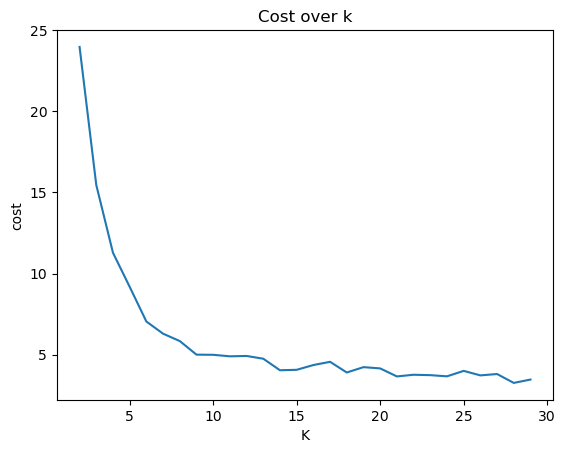

In [176]:
#plot the cost for each k
K = np.arange(2, 30)
print(K)
Jn = []
idx = 0

for k in K:
    mu, c, cluster, J = kmeans(X, k)
    Jn.append(J[-1])
    idx += 1
    
plt.plot(K, Jn)
plt.title('Cost over k')
plt.xlabel('K')
plt.ylabel('cost')

In [177]:
k = 7
mu, c, cluster, J = kmeans(X, k)
print(c.shape)

(1252,)


In [178]:
arr = np.array(c)
arr

array([0, 0, 6, ..., 6, 3, 2])

In [179]:
df = pd.read_csv('X_data.csv')
headers = np.array(df.columns)
headers = np.insert(headers, 0, "Clusters")
print(headers)

df = np.array(df)
df

['Clusters' 'Age' 'Gender' 'self_employed' 'family_history' 'treatment'
 'no_employees' 'remote_work' 'tech_company' 'benefits' 'care_options'
 'wellness_program' 'seek_help' 'anonymity' 'leave'
 'mental_health_consequence' 'phys_health_consequence' 'coworkers'
 'supervisor' 'mental_health_interview' 'phys_health_interview'
 'mental_vs_physical' 'obs_consequence']


array([[37,  1,  0, ...,  2,  1,  0],
       [44,  0,  0, ...,  2,  2,  0],
       [32,  0,  0, ...,  1,  2,  0],
       ...,
       [34,  0,  0, ...,  2,  2,  0],
       [46,  1,  0, ...,  2,  2,  0],
       [25,  0,  0, ...,  2,  2,  0]])

In [180]:
df = np.column_stack((arr, df))
df.shape


(1252, 23)

In [181]:
df = pd.DataFrame(df, columns=headers)
df

,Clusters,Age,Gender,self_employed,family_history,treatment,no_employees,remote_work,tech_company,benefits,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
0,0,37,1,0,0,1,5,0,1,1,...,1,4,2,2,1,1,2,2,1,0
1,0,44,0,0,0,0,5,0,0,2,...,2,4,2,2,0,0,2,2,2,0
2,6,32,0,0,0,0,5,0,1,2,...,2,3,2,2,1,1,1,1,2,0
3,5,31,0,0,1,1,5,0,1,2,...,2,3,1,1,1,0,2,2,2,1
4,5,31,0,0,0,0,5,1,1,1,...,2,4,2,2,1,1,1,1,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,2,26,0,0,0,1,5,0,1,2,...,2,4,2,2,1,1,2,2,2,0
1248,6,32,0,0,1,1,5,1,1,1,...,1,3,2,2,1,1,2,2,1,0
1249,6,34,0,0,1,1,5,0,1,1,...,2,3,1,1,0,0,2,2,2,0
1250,3,46,1,0,0,0,5,1,1,2,...,2,4,1,2,0,0,2,2,2,0


In [182]:
#Convertir a csv las Xs y las Ys
df.to_csv('DatosConCluster.csv', index=False)